In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from protozfits import SimpleFile
from pedestal import PedestalSimple, remove_pedestal
from event import Event
from tools import plot_hist

plt.rcParams.update({'font.size': 35})



In [3]:
N1 = 15000
f1 = SimpleFile("../data/Run021.1.fits.fz")
ped = PedestalSimple()

for i in range(0, N1):
    ev = next(f1.Events)
    Ev = Event(ev)
    Ev.read()
    ped.fill_pedestal_event(Ev)

ped.finalize_pedestal()

Not enough events. Error:  invalid value encountered in sqrt


In [30]:
%matplotlib qt
plt.rcParams['text.latex.preamble']=[r"\usepackage{times}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 60,
          'font.family' : 'times',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 
x = np.linspace(1, 1024, 1024)

plt.errorbar(x, ped.mean_value_channel_high_gain[0, :1024], yerr=ped.rms_high_gain[0, :1024], fmt='o', color="blue")
plt.xlabel("kondensator DRS4", fontsize=60)
plt.ylabel("sygnał", fontsize=60)
plt.grid(True)
plt.show()

In [4]:
def plot_spike(data_before_remove_spike, data_after_remove_spike):
    t = np.arange(2, 38, 1)
    fig, ax1 = plt.subplots(2, 1)

    ax1[0].step(t, data_before_remove_spike, 'b-', lw=4)
    ax1[0].set_ylim([-20, 50])
    ax1[0].set_ylabel("sygnał")
    ax1[0].set_xlabel("czas [ns]")
    ax1[0].grid(True)
    
    ax1[1].step(t, data_after_remove_spike, 'b-', lw=4)
    ax1[1].set_ylim([-20, 50])
    ax1[1].set_ylabel("sygnał")
    ax1[1].set_xlabel("czas [ns]")
    ax1[1].grid(True)
    plt.show()
    

Spike A
i=  43
pos = 12


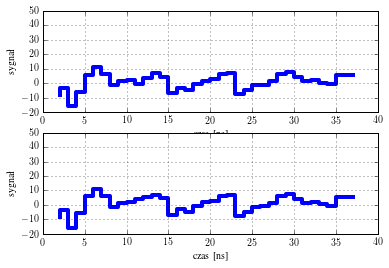

Spike A
i=  44
pos = 24


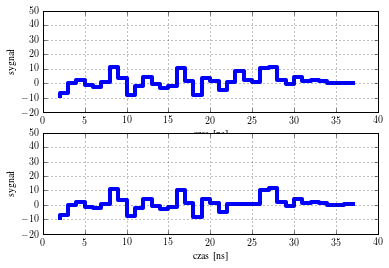

Spike A
i=  45
pos = 37


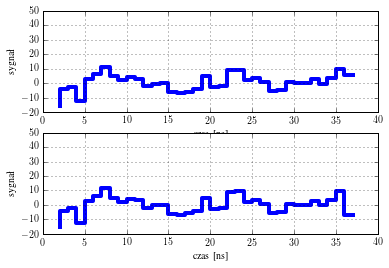

Spike A
i=  123
pos = 4


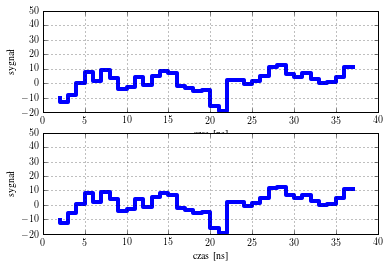

Spike A
i=  124
pos = 14


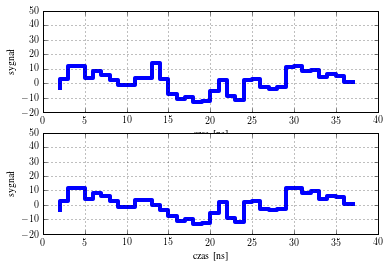

Spike A
i=  125
pos = 25


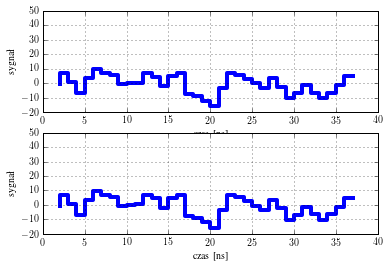

Spike A
i=  205
pos = 10


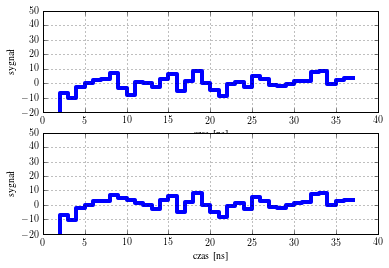

Spike A
i=  206
pos = 23


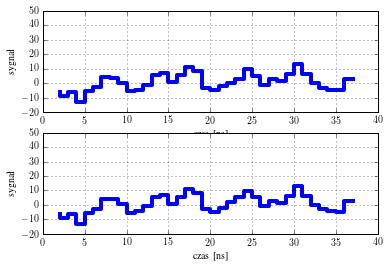

Spike A
i=  207
pos = 35


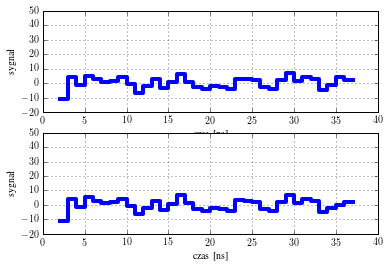

Spike A
i=  286
pos = 13


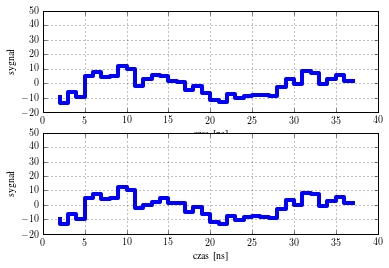

Spike A
i=  287
pos = 26


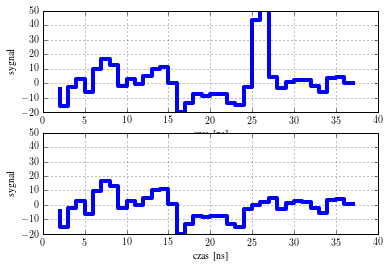

Spike A
i=  367
pos = 6


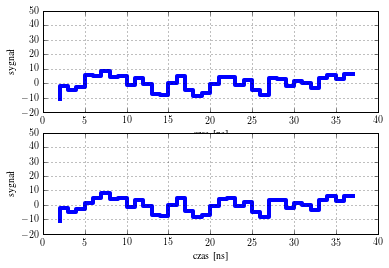

Spike A
i=  368
pos = 19


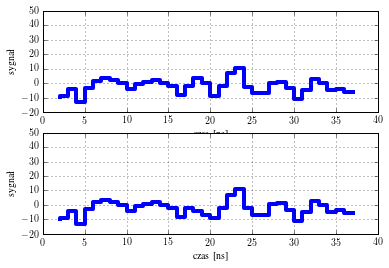

Spike A
i=  369
pos = 33


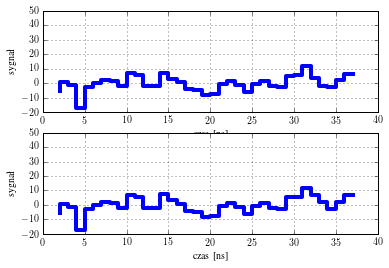

Spike A
i=  448
pos = 12


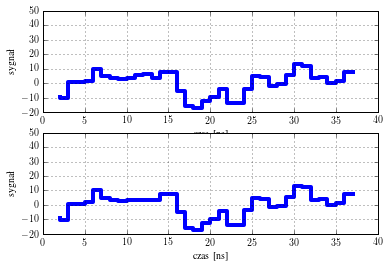

Spike A
i=  449
pos = 24


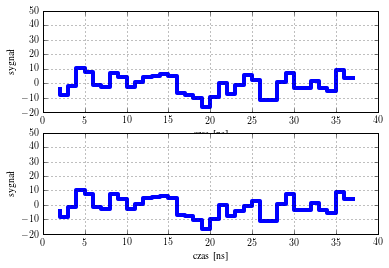

Spike A
i=  450
pos = 37


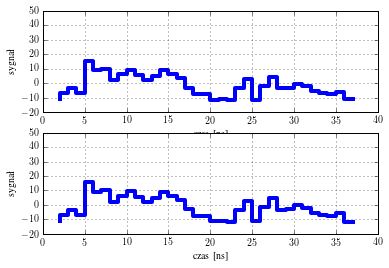

Spike A
i=  529
pos = 12


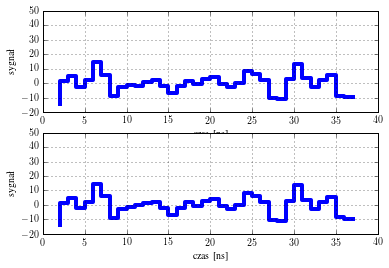

Spike A
i=  530
pos = 23


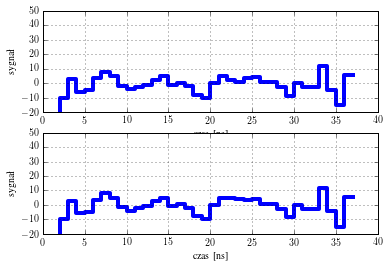

Spike A
i=  531
pos = 37


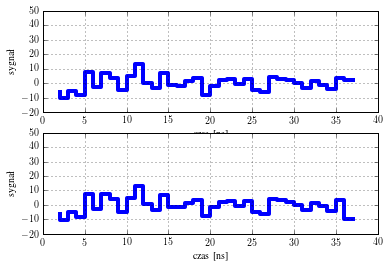

Spike A
i=  610
pos = 10


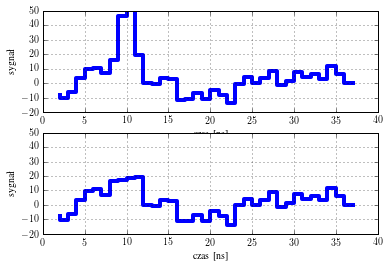

Spike A
i=  611
pos = 23


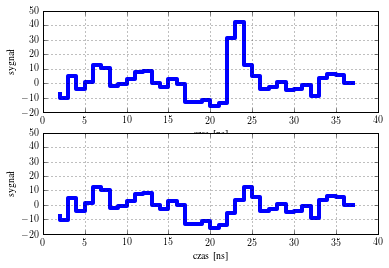

Spike A
i=  612
pos = 36


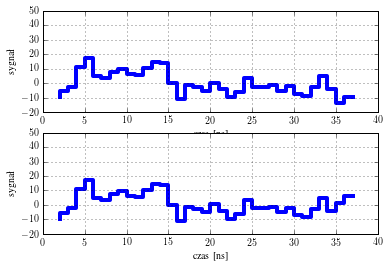

Spike A
i=  691
pos = 10


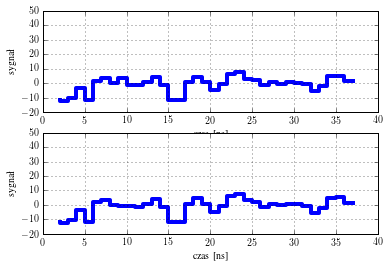

Spike A
i=  692
pos = 24


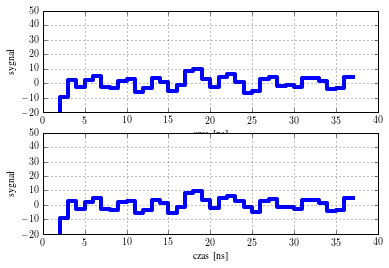

Spike A
i=  693
pos = 37


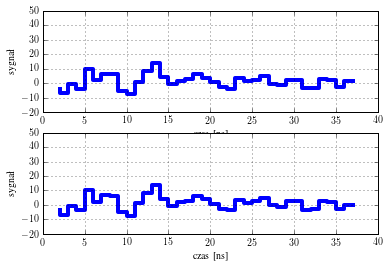

Spike A
i=  772
pos = 11


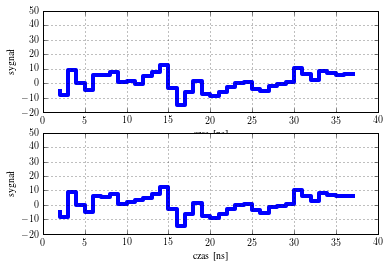

Spike A
i=  773
pos = 22


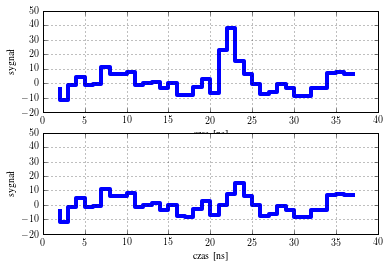

Spike A
i=  774
pos = 34


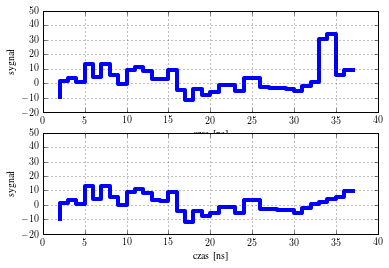

Spike A
i=  853
pos = 9


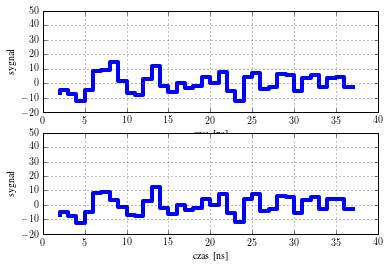

Spike A
i=  854
pos = 23


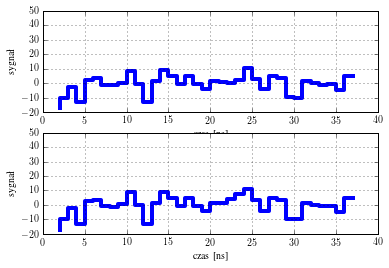

Spike A
i=  855
pos = 34


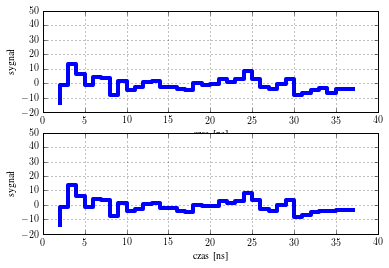

Spike A
i=  934
pos = 9


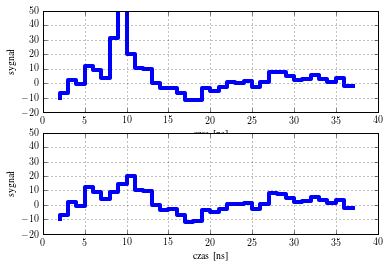

Spike A
i=  935
pos = 22


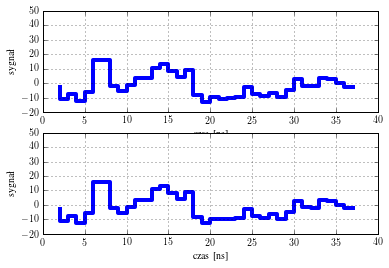

Spike A
i=  1015
pos = 5


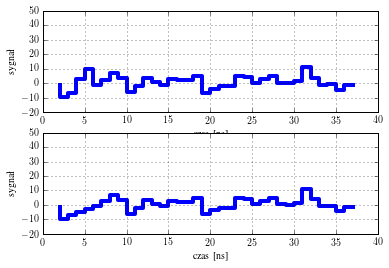

Spike A
i=  1016
pos = 18


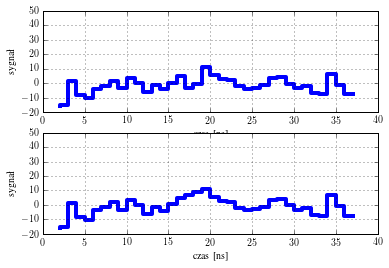

Spike A
i=  1017
pos = 33


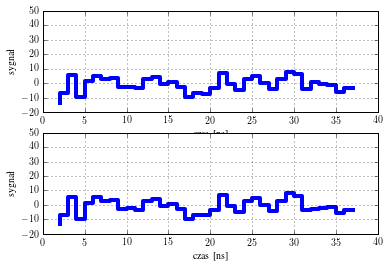

Spike A
i=  1096
pos = 9


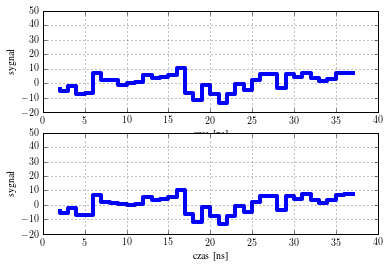

Spike A
i=  1097
pos = 22


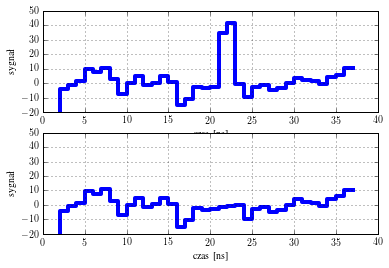

Spike A
i=  1098
pos = 34


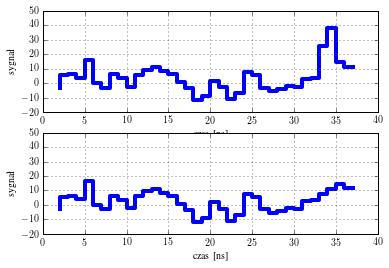

Spike A
i=  1177
pos = 3


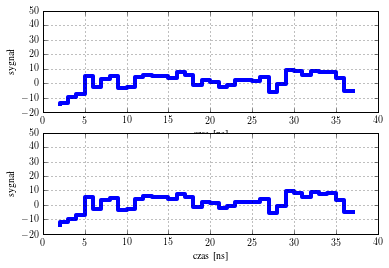

Spike A
i=  1178
pos = 17


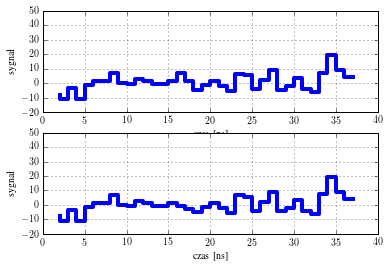

Spike A
i=  1179
pos = 32


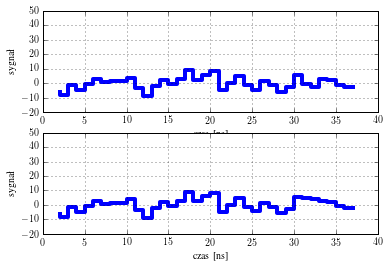

Spike A
i=  1258
pos = 7


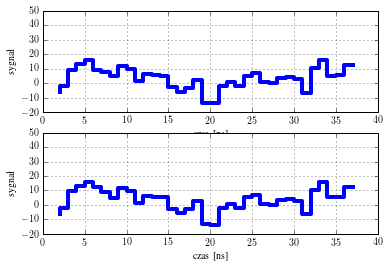

Spike A
i=  1259
pos = 18


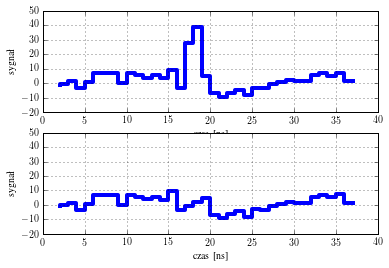

Spike A
i=  1260
pos = 32


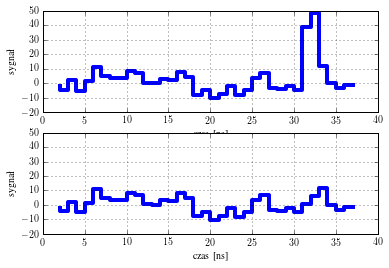

Spike A
i=  1339
pos = 4


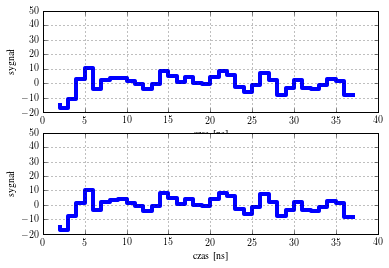

Spike A
i=  1340
pos = 15


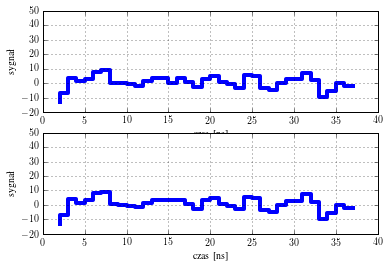

Spike A
i=  1341
pos = 29


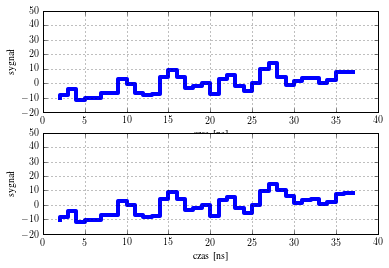

Spike A
i=  1420
pos = 4


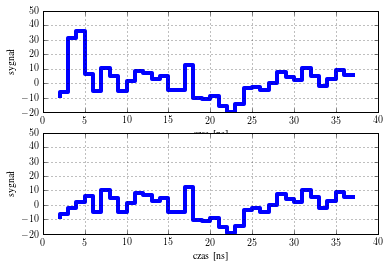

Spike A
i=  1421
pos = 19


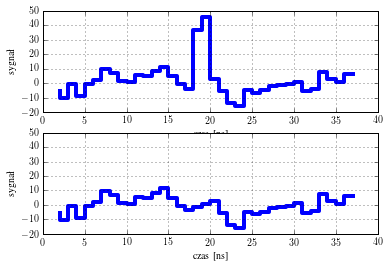

Spike A
i=  1422
pos = 31


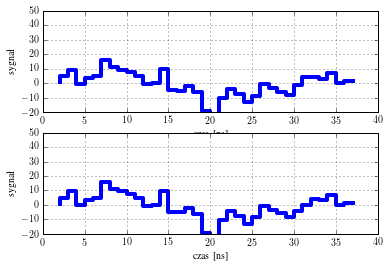

Spike A
i=  1502
pos = 15


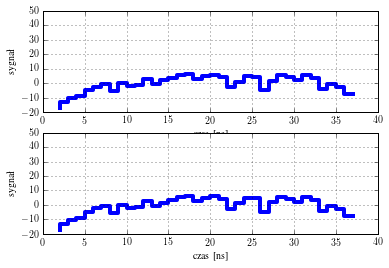

Spike A
i=  1503
pos = 28


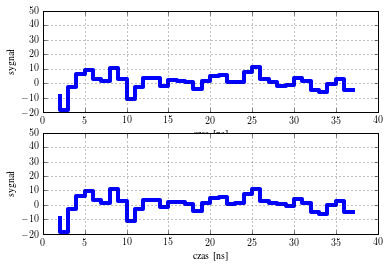

Spike A
i=  1582
pos = 4


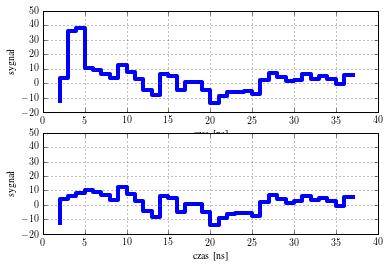

Spike A
i=  1583
pos = 16


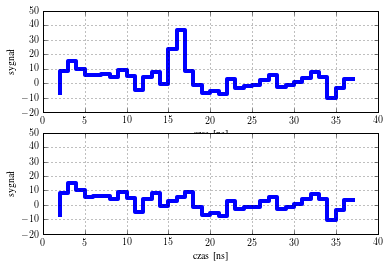

Spike A
i=  1584
pos = 27


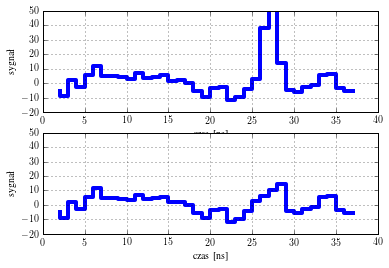

Spike A
i=  1664
pos = 13


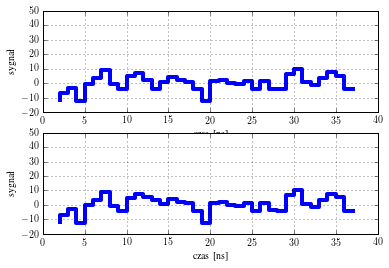

Spike A
i=  1665
pos = 24


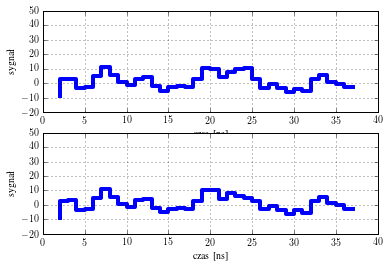

Spike A
i=  1666
pos = 36


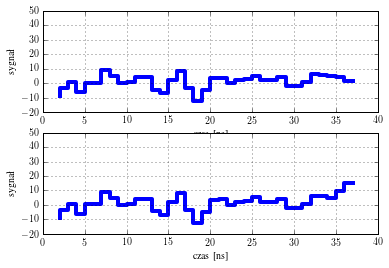

Spike A
i=  1745
pos = 10


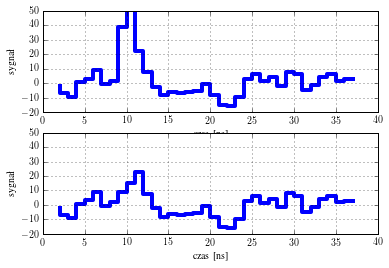

Spike A
i=  1746
pos = 23


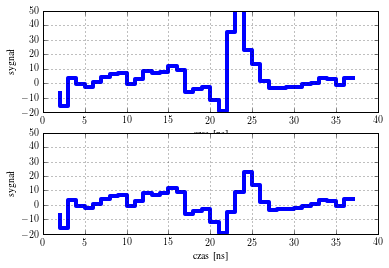

Spike A
i=  1747
pos = 35


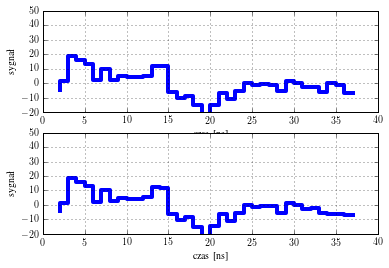

Spike A
i=  1826
pos = 8


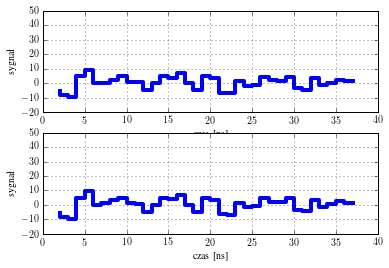

Spike A
i=  1827
pos = 20


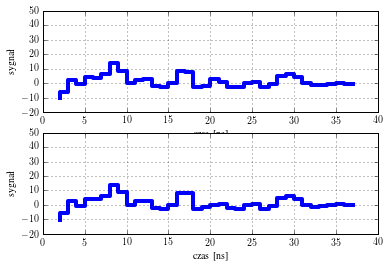

Spike A
i=  1828
pos = 33


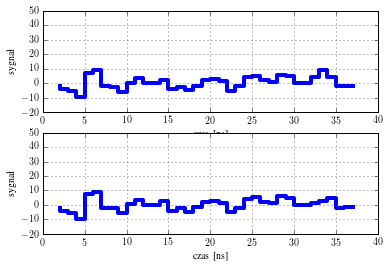

Spike A
i=  1907
pos = 6


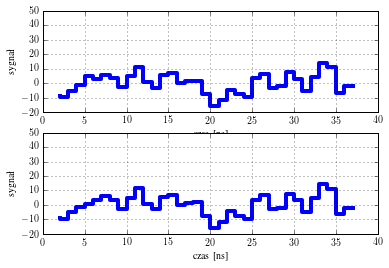

Spike A
i=  1908
pos = 18


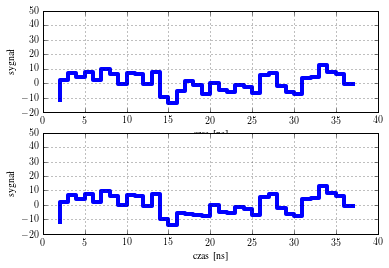

Spike A
i=  1909
pos = 30


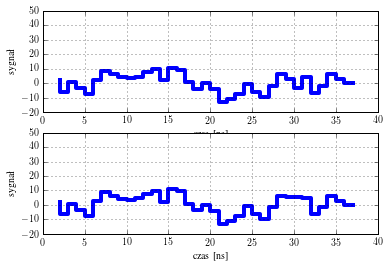

Spike A
i=  1988
pos = 3


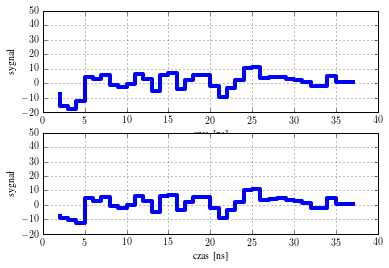

Spike A
i=  1989
pos = 15


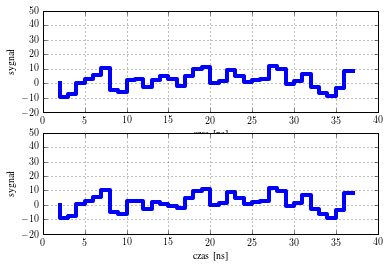

Spike A
i=  1990
pos = 26


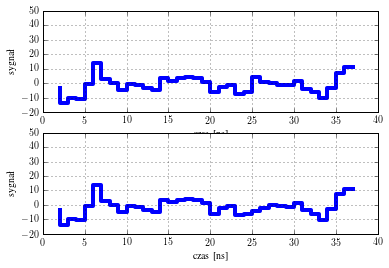

Spike A
i=  2070
pos = 14


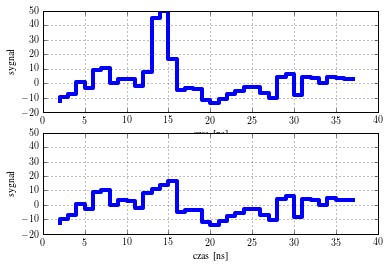

Spike A
i=  2071
pos = 27


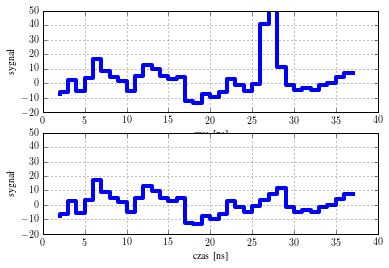

Spike A
i=  2151
pos = 9


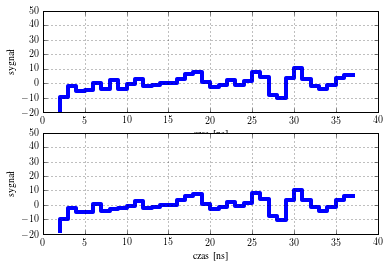

Spike A
i=  2152
pos = 20


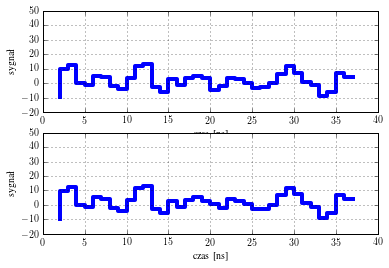

Spike A
i=  2153
pos = 32


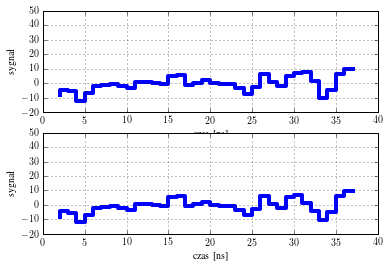

Spike A
i=  2232
pos = 10


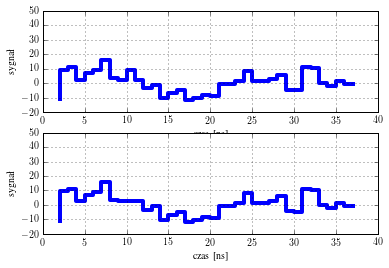

Spike A
i=  2233
pos = 20


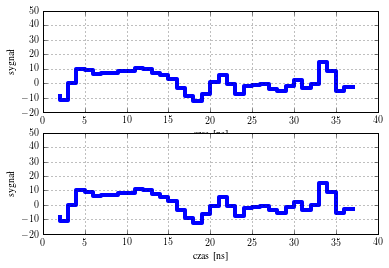

Spike A
i=  2234
pos = 33


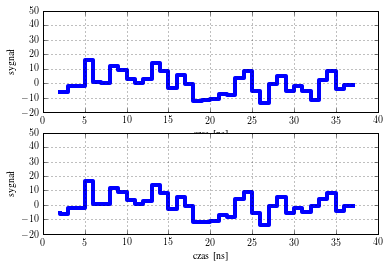

Spike A
i=  2313
pos = 5


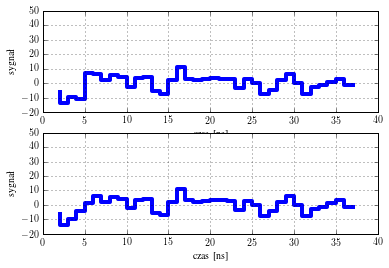

Spike A
i=  2314
pos = 19


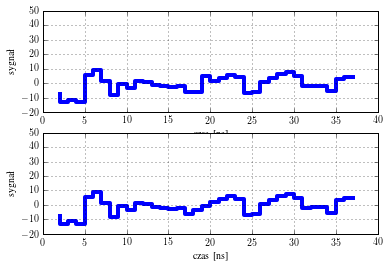

Spike A
i=  2315
pos = 32


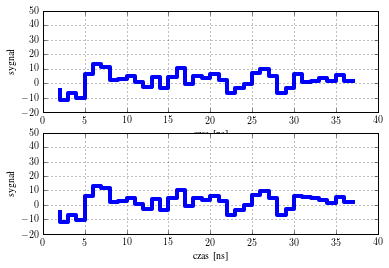

Spike A
i=  2394
pos = 4


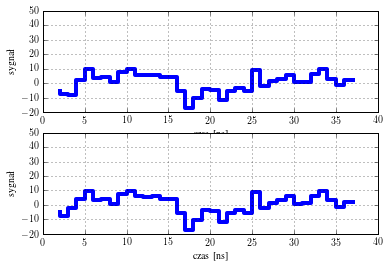

Spike A
i=  2395
pos = 17


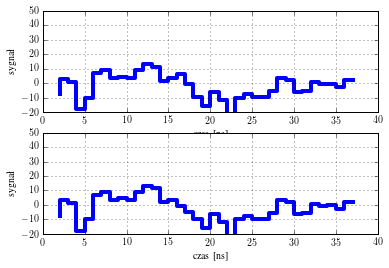

Spike A
i=  2396
pos = 31


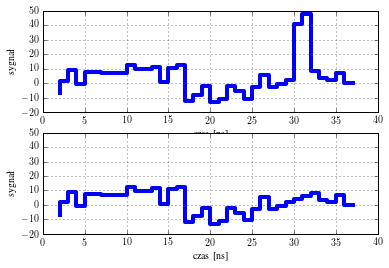

Spike A
i=  2476
pos = 13


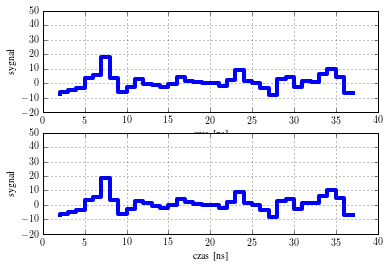

Spike A
i=  2477
pos = 27


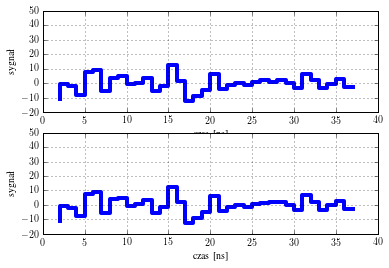

Spike A
i=  2557
pos = 15


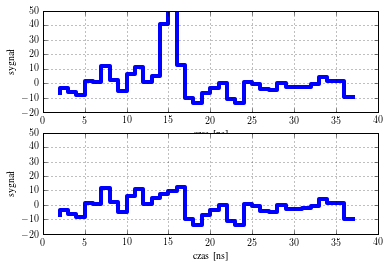

Spike A
i=  2558
pos = 29


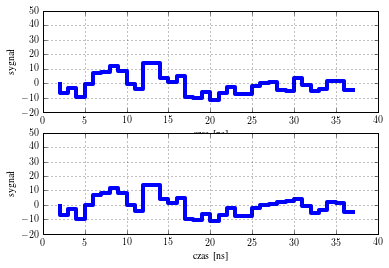

Spike A
i=  2638
pos = 12


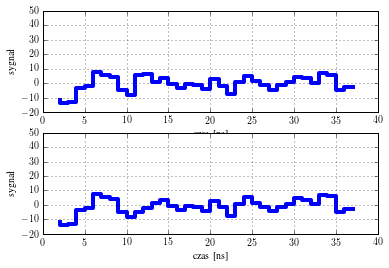

Spike A
i=  2639
pos = 24


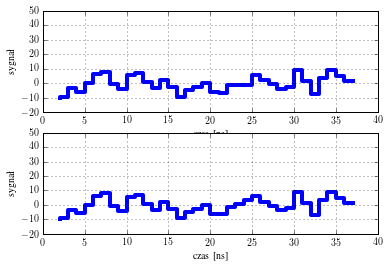

Spike A
i=  2640
pos = 36


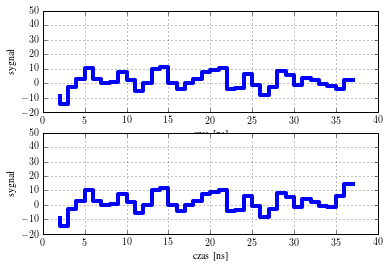

Spike A
i=  2719
pos = 11


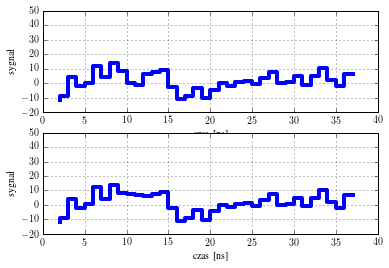

Spike A
i=  2720
pos = 25


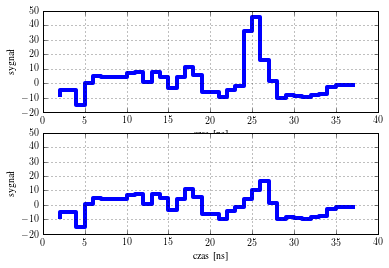

Spike A
i=  2800
pos = 6


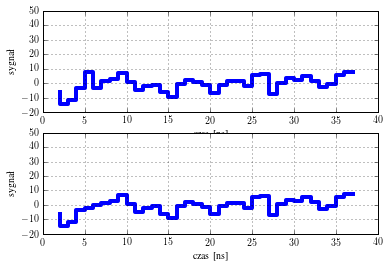

Spike A
i=  2801
pos = 20


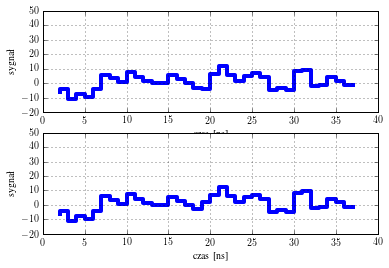

Spike A
i=  2802
pos = 34


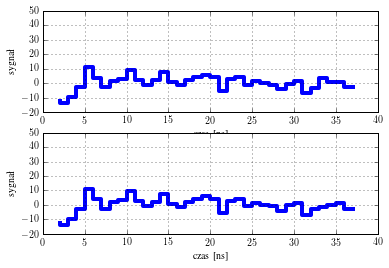

Spike A
i=  2881
pos = 11


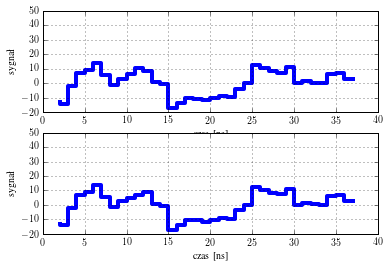

Spike A
i=  2882
pos = 22


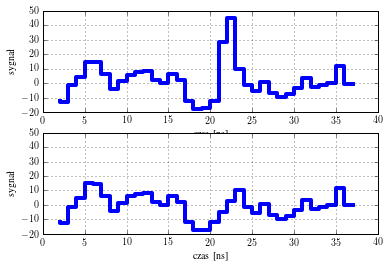

Spike A
i=  2883
pos = 36


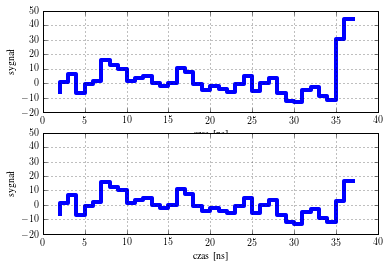

Spike A
i=  2962
pos = 7


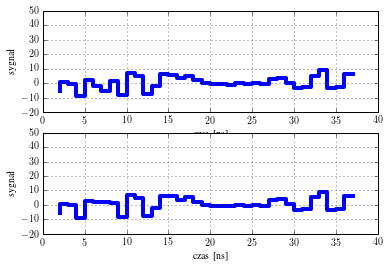

Spike A
i=  2963
pos = 20


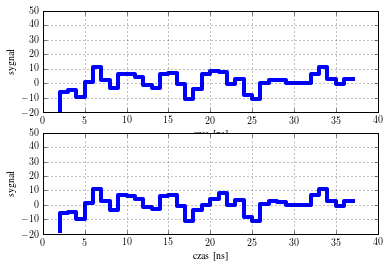

Spike A
i=  2964
pos = 31


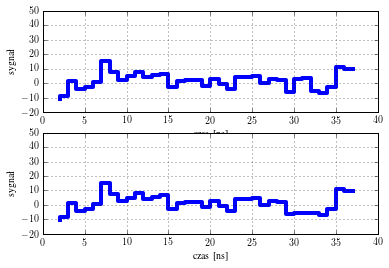

Spike A
i=  3043
pos = 7


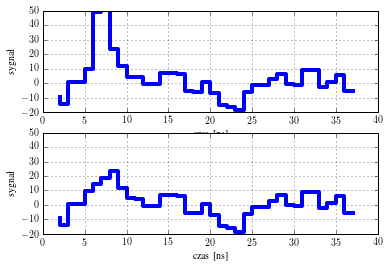

Spike A
i=  3044
pos = 20


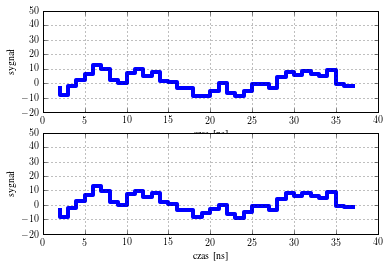

Spike A
i=  3045
pos = 32


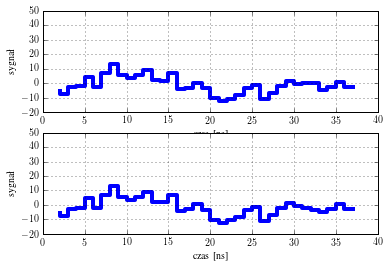

Spike A
i=  3124
pos = 4


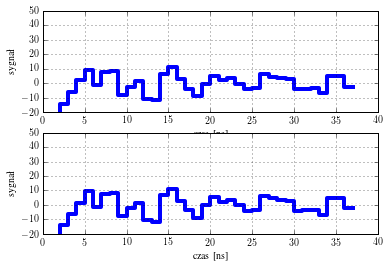

Spike A
i=  3125
pos = 17


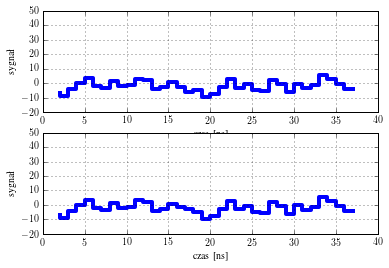

Spike A
i=  3126
pos = 29


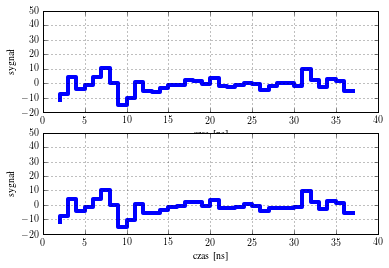

Spike A
i=  3205
pos = 7


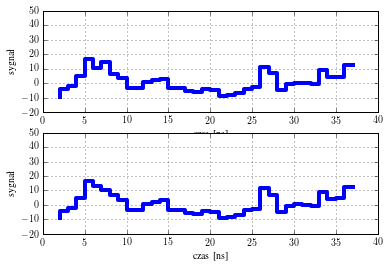

Spike A
i=  3206
pos = 18


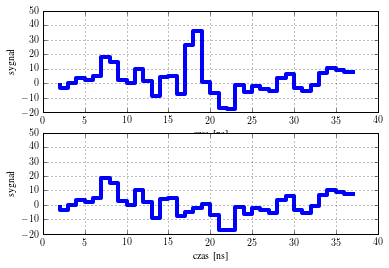

Spike A
i=  3207
pos = 30


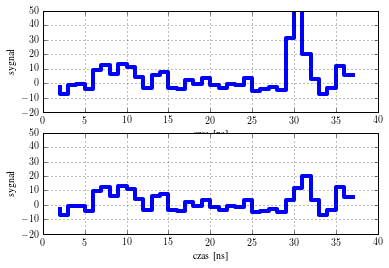

Spike A
i=  3286
pos = 4


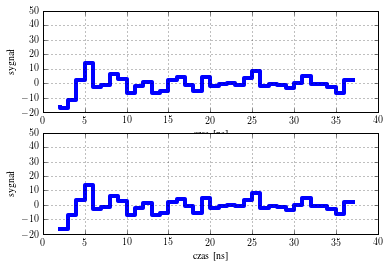

Spike A
i=  3287
pos = 16


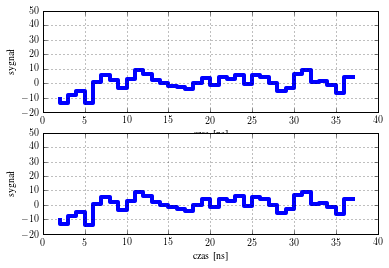

Spike A
i=  3288
pos = 28


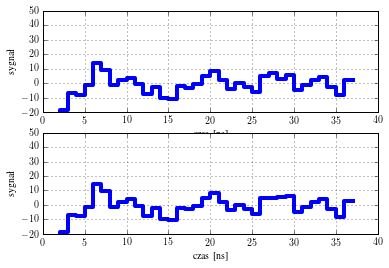

Spike A
i=  3367
pos = 6


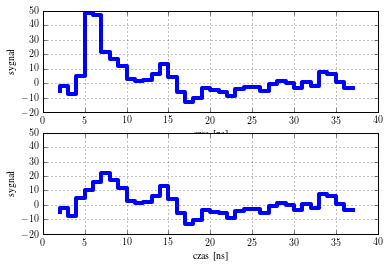

Spike A
i=  3368
pos = 17


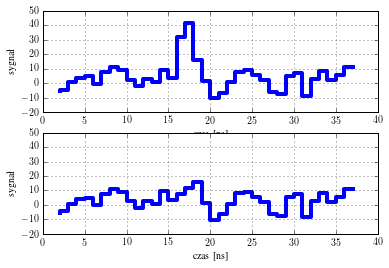

Spike A
i=  3369
pos = 28


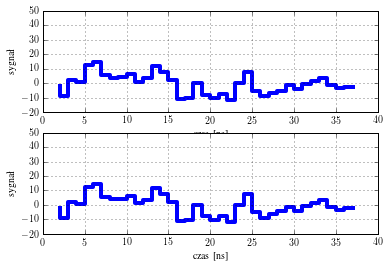

Spike A
i=  3448
pos = 3


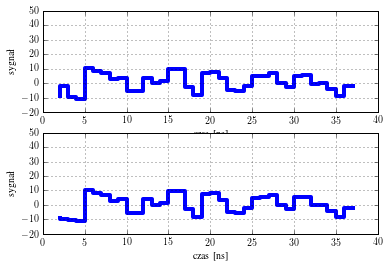

Spike A
i=  3449
pos = 15


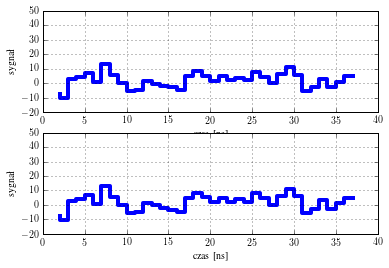

Spike A
i=  3450
pos = 27


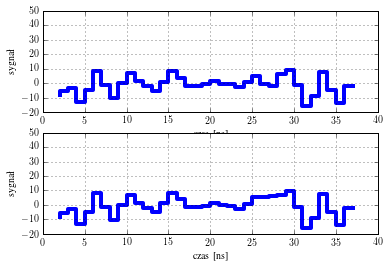

Spike A
i=  3529
pos = 5


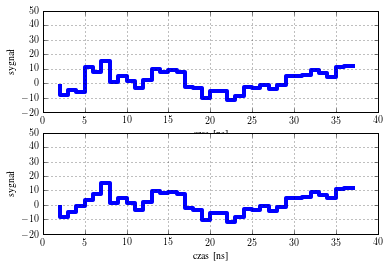

Spike A
i=  3530
pos = 18


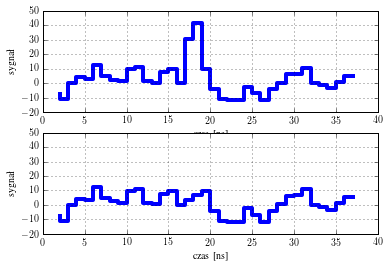

Spike A
i=  3531
pos = 28


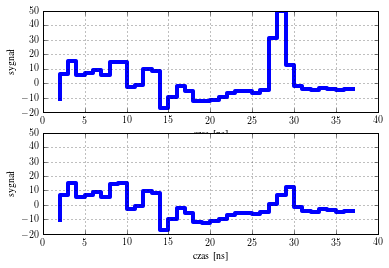

Spike A
i=  3611
pos = 13


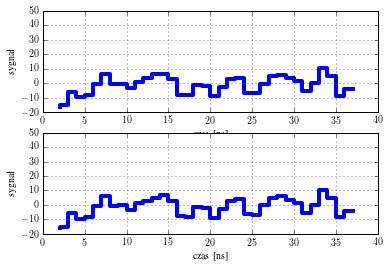

Spike A
i=  3612
pos = 24


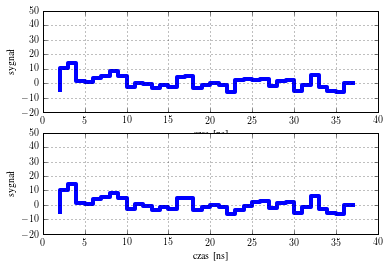

Spike A
i=  3613
pos = 37


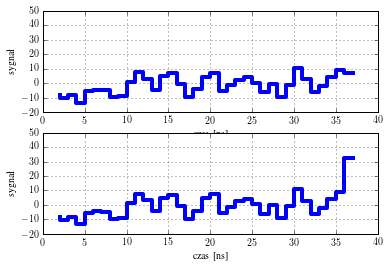

Spike A
i=  3691
pos = 4


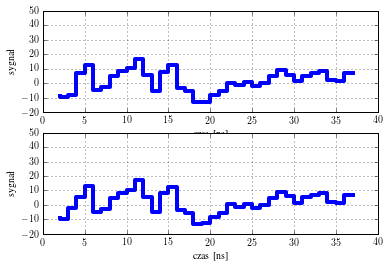

Spike A
i=  3692
pos = 16


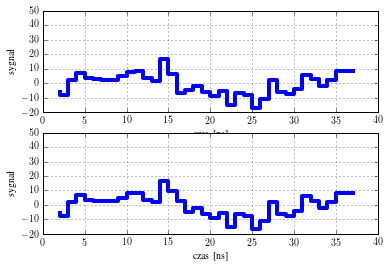

Spike A
i=  3693
pos = 28


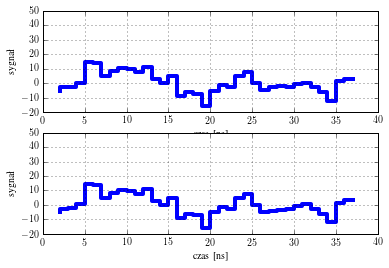

Spike A
i=  3773
pos = 10


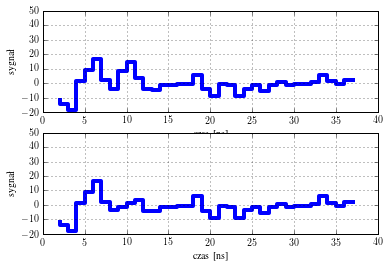

Spike A
i=  3774
pos = 23


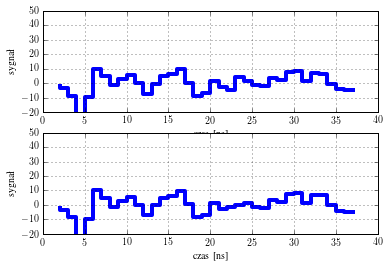

Spike A
i=  3775
pos = 36


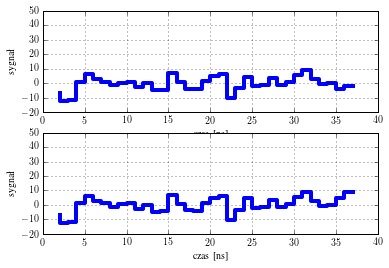

Spike A
i=  3854
pos = 12


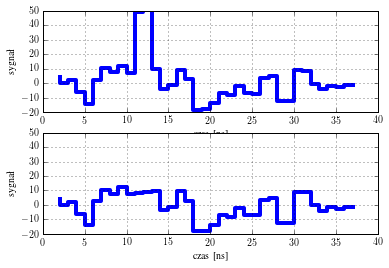

Spike A
i=  3855
pos = 27


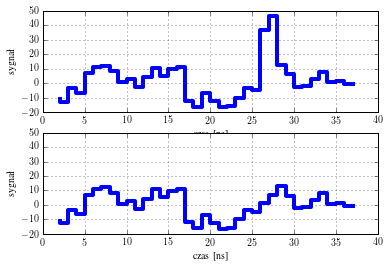

Spike A
i=  3935
pos = 6


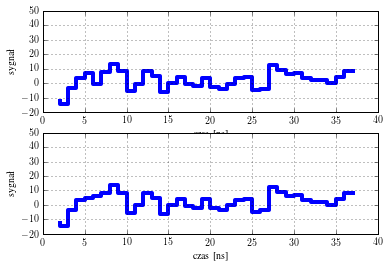

Spike A
i=  3936
pos = 19


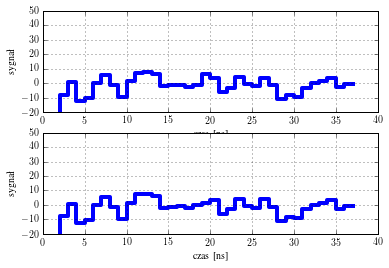

Spike A
i=  3937
pos = 33


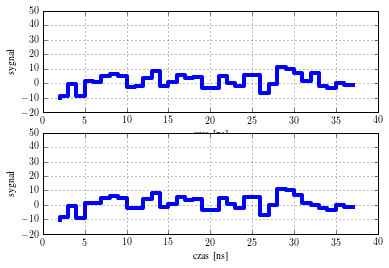

Spike A
i=  4016
pos = 9


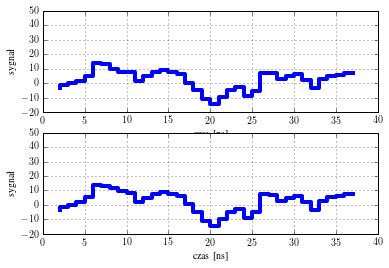

Spike A
i=  4017
pos = 23


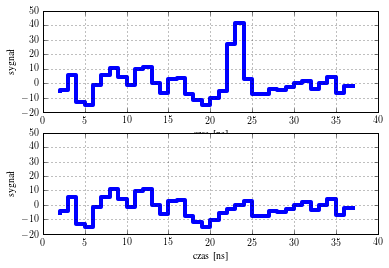

Spike A
i=  4018
pos = 36


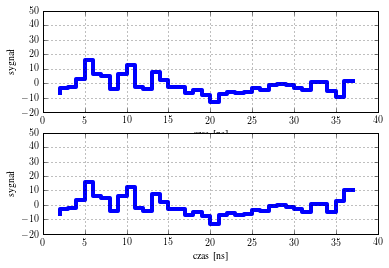

Spike A
i=  4097
pos = 5


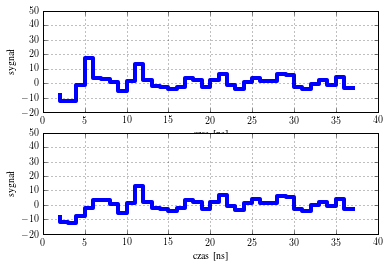

Spike A
i=  4098
pos = 16


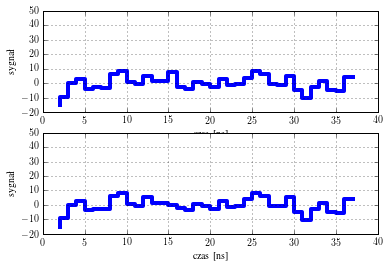

Spike A
i=  4099
pos = 28


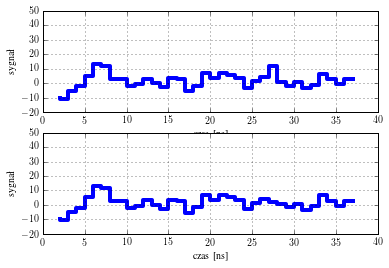

Spike A
i=  4178
pos = 5


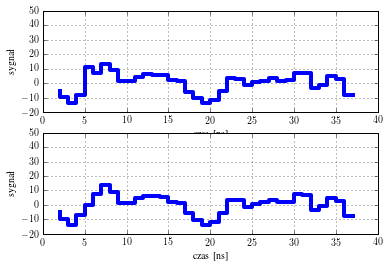

Spike A
i=  4179
pos = 16


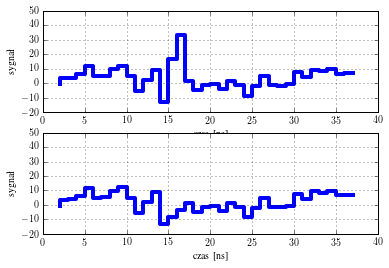

Spike A
i=  4180
pos = 28


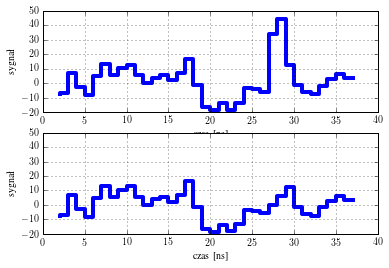

Spike A
i=  4260
pos = 14


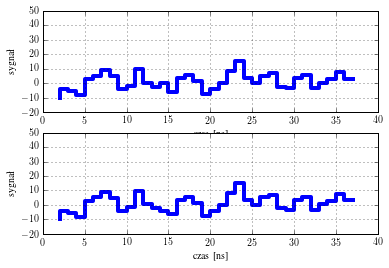

Spike A
i=  4261
pos = 28


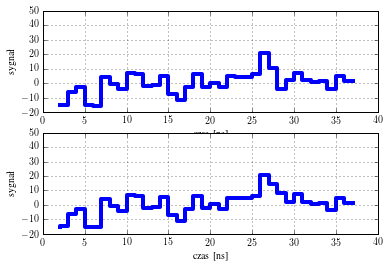

Spike A
i=  4341
pos = 15


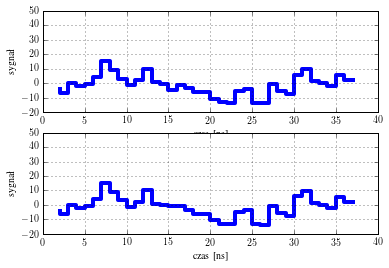

Spike A
i=  4342
pos = 26


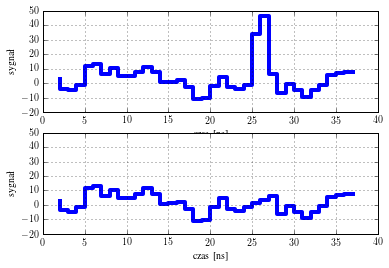

Spike A
i=  4422
pos = 12


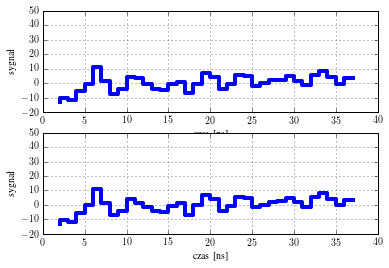

Spike A
i=  4423
pos = 25


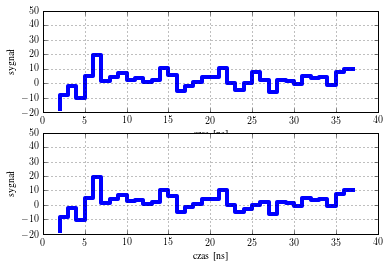

Spike A
i=  4424
pos = 37


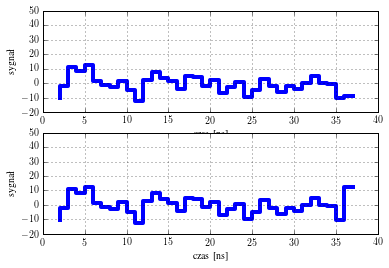

Spike A
i=  4503
pos = 11


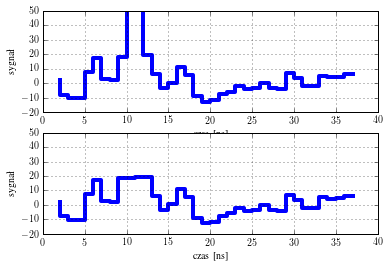

Spike A
i=  4504
pos = 24


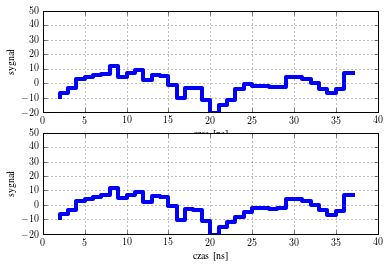

Spike A
i=  4505
pos = 35


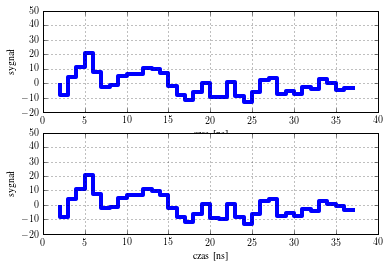

Spike A
i=  4584
pos = 7


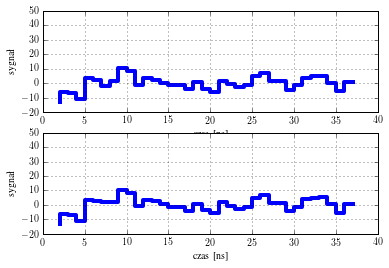

Spike A
i=  4585
pos = 21


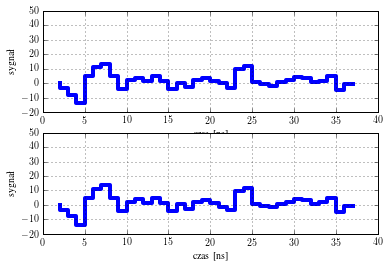

Spike A
i=  4586
pos = 33


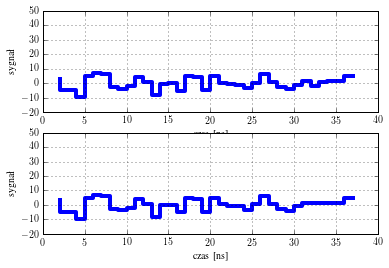

Spike A
i=  4665
pos = 9


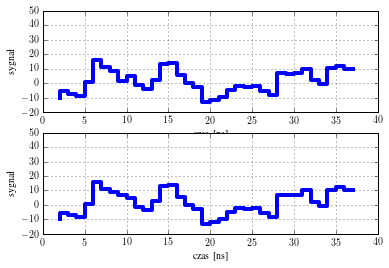

Spike A
i=  4666
pos = 22


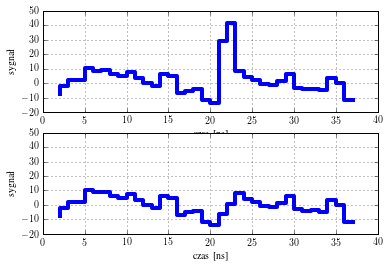

Spike A
i=  4667
pos = 35


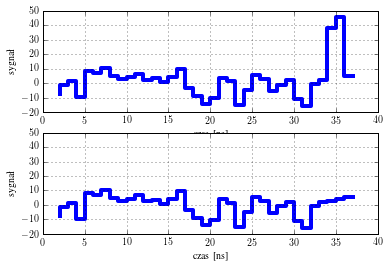

Spike A
i=  4746
pos = 5


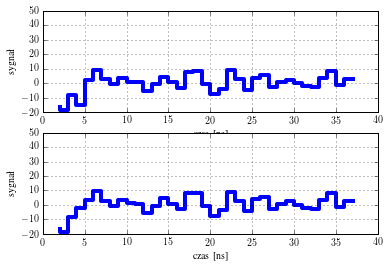

Spike A
i=  4747
pos = 17


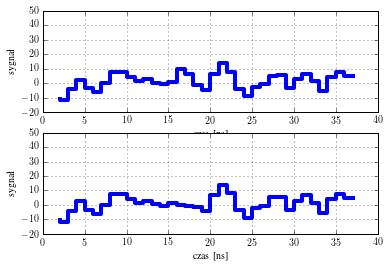

Spike A
i=  4748
pos = 29


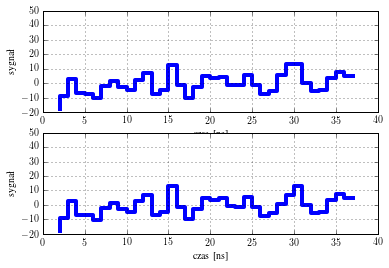

Spike A
i=  4827
pos = 7


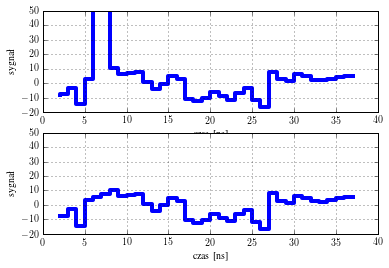

Spike A
i=  4828
pos = 20


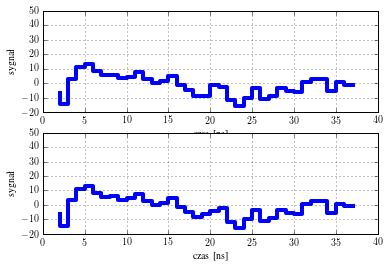

Spike A
i=  4829
pos = 31


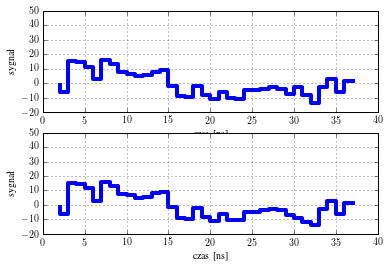

Spike A
i=  4909
pos = 15


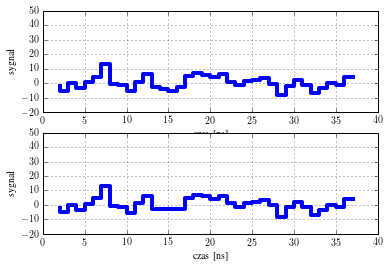

Spike A
i=  4910
pos = 28


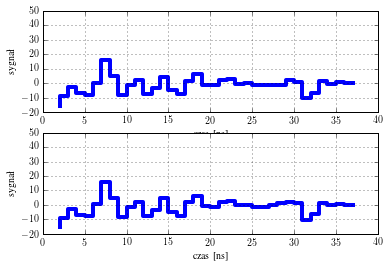

Spike A
i=  4989
pos = 4


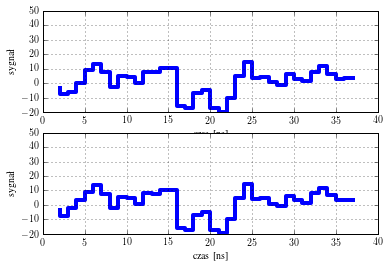

Spike A
i=  4990
pos = 16


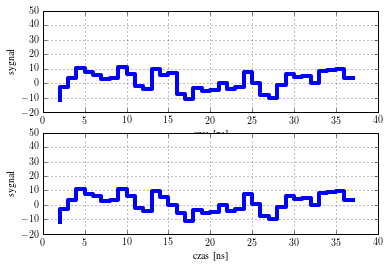

Spike A
i=  4991
pos = 28


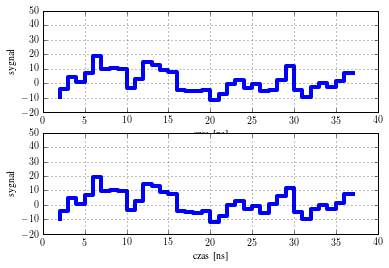

' \n        spike_b_pos = int((fc_hg_old[j] - 1 - Ev.first_capacitor_high_gain[j] + 2*size4drs)%size4drs)\n        if spike_b_pos < roisize-1:\n            print("spike b")\n            print(" i = ", i)\n            print("pos =", spike_b_pos)\n            samples = event_hi_gain_after_remove_pedestal[i, j, :]\n            value = 0.5 * (samples[spike_b_pos - 1] + samples[spike_b_pos + 1])\n            event_hg_after_remove_spike[i, j, spike_b_pos] = value\n            plot_spike(event_hi_gain_after_remove_pedestal[i, j, 2:38], event_hg_after_remove_spike[i, j, 2:38])\n'

In [31]:
%matplotlib inline
N2 = 5000
roisize = 40
size4drs = 4*1024

event_hi_gain_before_remove_pedestal = np.zeros((N2, 8, 40))
event_hi_gain_after_remove_pedestal = np.zeros((N2, 8, 40))
event_hg_after_remove_spike = np.zeros((N2, 8, 40))
fc_hg_old = np.zeros(8)

ev = next(f1.Events)
Ev = Event(ev)
Ev.read()

for i in range(0, N2):
    fc_hg_old = Ev.first_capacitor_high_gain
    ev = next(f1.Events)
    Ev = Event(ev)
    Ev.read()
    event_hi_gain_before_remove_pedestal[i, :, :] = Ev.samples_high_gain[:, :]
    remove_pedestal(Ev, ped)

    
    for j in range(2, 3):
        event_hi_gain_after_remove_pedestal[i, j, :] = Ev.samples_high_gain[j, :]
        event_hg_after_remove_spike[i, j, :] = Ev.samples_high_gain[j, :]
        # looking for spike A
        for k in range(0, 4):
            abspos = int(1024 - roisize-2 - fc_hg_old[j]+ k*1024 +size4drs)
            pos = int((abspos - Ev.first_capacitor_high_gain[j] + size4drs)%size4drs)
            if ((pos > 0) and (pos <= roisize-1)) or (pos == size4drs -1):
                if (pos > 2 and pos < 38): 
                    samples = event_hi_gain_after_remove_pedestal[i, j, :]
                    value1 = samples[pos - 1] + 0.33 * (samples[pos + 2] - samples[pos - 1])
                    value2 = samples[pos - 1] + 0.66 * (samples[pos + 2] - samples[pos - 1])
    
                    event_hg_after_remove_spike[i, j, pos] = value1
                    event_hg_after_remove_spike[i, j, pos+1] = value2
                    
                    print("Spike A")
                    print("i= ",i)
                    print("pos =", pos)
                    plot_spike(event_hi_gain_after_remove_pedestal[i, j, 2:38], event_hg_after_remove_spike[i, j, 2:38])
                if pos == size4drs -1:
                    samples = event_hi_gain_after_remove_pedestal[i, j, :]
                    value = samples[1]
                    event_hg_after_remove_spike[i, j, 0] = value
    
''' 
        spike_b_pos = int((fc_hg_old[j] - 1 - Ev.first_capacitor_high_gain[j] + 2*size4drs)%size4drs)
        if spike_b_pos < roisize-1:
            print("spike b")
            print(" i = ", i)
            print("pos =", spike_b_pos)
            samples = event_hi_gain_after_remove_pedestal[i, j, :]
            value = 0.5 * (samples[spike_b_pos - 1] + samples[spike_b_pos + 1])
            event_hg_after_remove_spike[i, j, spike_b_pos] = value
            plot_spike(event_hi_gain_after_remove_pedestal[i, j, 2:38], event_hg_after_remove_spike[i, j, 2:38])
'''  

In [57]:
%matplotlib qt

plt.rcParams['text.latex.preamble']=[r"\usepackage{times}"]
#Options
params = {'text.usetex' : True,
          'font.family' : 'times',
          'text.latex.unicode': True,
          'font.size' : 60
          }
plt.rcParams.update(params)

t = np.arange(2, 38, 1)

fig, (ax0, ax1) = plt.subplots(nrows = 2)

ax0.step(t, event_hi_gain_after_remove_pedestal[241, 2, 2:38], 'b-', lw=4)
ax0.set_ylabel("sygnał - offset", fontsize=60)
ax0.set_xlabel("czas [ns]", fontsize=60)
ax0.set_ylim([-20, 80])
ax0.grid()
ax0.add_patch(
    patches.Arrow(
        7.5,            # x
        42,            # y
        5,            # dx
        0,            # dy
        width=15.,       # optional - defaults to 1.0
        facecolor="black"
    )
)
#ax0.text(5, 51, "Spike typu A")

ax1.step(t, event_hg_after_remove_spike[241, 2, 2:38], 'b-', lw=4)
ax1.set_ylabel("sygnał - offset", fontsize=60)
ax1.set_xlabel("czas [ns]", fontsize=60)
ax1.set_ylim([-20, 80])
plt.grid(True)
plt.show()


# Histogram

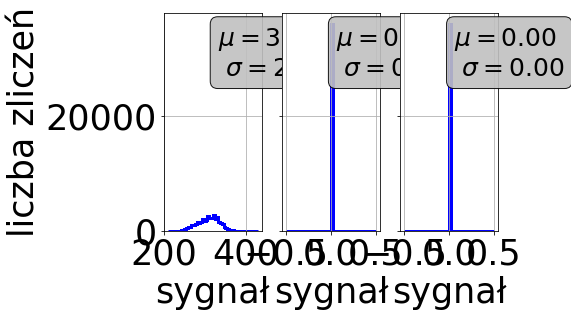

In [6]:
%matplotlib qt
fig, ax1 = plt.subplots(1, 3, sharey=True)

ax1[0].hist(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel(), bins=50, color="blue", lw=3, histtype='step')
mu = np.mean(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel())
sigma = np.std(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel())
textstr = '$\mu=%.2f$\n $\sigma=%.2f$' % (mu, sigma)
props = dict(boxstyle='round', facecolor='silver', alpha=0.9)
ax1[0].text(0.55, 0.95, textstr, transform=ax1[0].transAxes, fontsize=25, verticalalignment='top', bbox=props)
ax1[0].set_xlabel("sygnał")
ax1[0].set_ylabel("liczba zliczeń")

ax1[1].hist(event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel(), bins=50, color="blue", lw=3, histtype='step')
mu = np.mean(event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel())
sigma = np.std(event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel())
textstr = '$\mu=%.2f$\n $\sigma=%.2f$' % (mu, sigma)
props = dict(boxstyle='round', facecolor='silver', alpha=0.9)
ax1[1].text(0.55, 0.95, textstr, transform=ax1[1].transAxes, fontsize=25, verticalalignment='top', bbox=props)
ax1[1].set_xlabel("sygnał")


ax1[2].hist(event_hg_after_remove_spike[:, 1, 2:38].ravel(), bins=50, color="blue", lw=3, histtype='step')
mu = np.mean(event_hg_after_remove_spike[:, 1, 2:38].ravel())
sigma = np.std(event_hg_after_remove_spike[:, 1, 2:38].ravel())
textstr = '$\mu=%.2f$\n $\sigma=%.2f$' % (mu, sigma)
props = dict(boxstyle='round', facecolor='silver', alpha=0.9)
ax1[2].text(0.55, 0.95, textstr, transform=ax1[2].transAxes, fontsize=25, verticalalignment='top', bbox=props)
ax1[2].set_xlabel("sygnał")

ax1[0].grid(True)
ax1[1].grid(True)
ax1[2].grid(True)
plt.show()

In [26]:
%matplotlib qt
plt.rcParams['text.latex.preamble']=[r"\usepackage{times}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 60,
          'font.family' : 'times',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

fig, ax1 = plt.subplots(1, 2, sharey=True)

ax1[0].hist(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel(), bins=50, color="blue", lw=4, histtype='step', range=(200,440))
sigma = np.std(event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel())
textstr = '$\sigma=%.2f$' % (sigma)
props = dict(boxstyle='round', facecolor='silver', alpha=0.5)
ax1[0].text(0.60, 0.95, textstr, transform=ax1[0].transAxes, fontsize=60, verticalalignment='top', bbox=props)
ax1[0].set_xlabel("sygnał")
ax1[0].set_ylabel("liczba zliczeń")

ax1[1].hist(event_hi_gain_after_remove_pedestal[:, 2, 2:38].ravel(), bins=50, color="blue", lw=4, histtype='step', range=(-120,120))
sigma = np.std(event_hi_gain_after_remove_pedestal[:, 2, 2:38].ravel())
textstr = '$\sigma=%.2f$' % (sigma)
props = dict(boxstyle='round', facecolor='silver', alpha=0.5)
ax1[1].text(0.65, 0.95, textstr, transform=ax1[1].transAxes, fontsize=60, verticalalignment='top', bbox=props)
ax1[1].set_xlabel("sygnał - offset")


ax1[0].grid(True)
ax1[1].grid(True)
ax1[0].set_xlim(200, 440)
ax1[1].set_xlim(-110, 110)
ax1[0].set_ylim(0.9, 0.5*1e5)
ax1[1].set_ylim(0.9, 0.5*1e5)
ax1[0].set_yscale("log")
ax1[1].set_yscale("log")
plt.show()

# Plot substract pedestal for one channel

In [27]:
%matplotlib qt
plt.rcParams['text.latex.preamble']=[r"\usepackage{times}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 60,
          'font.family' : 'times',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

t = np.arange(2, 38, 1)

fig, (ax0, ax1) = plt.subplots(nrows = 2)

ax0.step(t, event_hi_gain_before_remove_pedestal[3, 2, 2:38], 'b-', lw=4)
ax0.set_ylabel("sygnał", fontsize=60)
ax0.set_xlabel("czas [ns]", fontsize=60)
ax0.axhline(color='k', lw=1)
ax0.set_ylim([180, 280])
ax0.grid()

ax1.step(t, event_hi_gain_after_remove_pedestal[3, 2, 2:38], 'b-', lw=4)
ax1.set_ylabel("sygnał - offset", fontsize=60)
ax1.set_xlabel("czas [ns]", fontsize=60)
ax1.set_ylim([-50, 50])
plt.grid(True)
plt.show()


In [ ]:


y1 = event_hi_gain_after_remove_pedestal[:, 1, 2:38].ravel()
y2 = event_hi_gain_before_remove_pedestal[:, 1, 2:38].ravel()
y3 = event_hg_after_remove_spike[:, 1, 2:38].ravel()
z1 = (y1 - np.mean(y1))/np.std(y1)
z2 = (y2 - np.mean(y2))/np.std(y2)
z3 = (y3 - np.mean(y3))/np.std(y3)
plt.figure()
plt.hist(z1/max(z1), bins=50,  histtype='step')
plt.hist(z2/max(z2), bins=50,  histtype='step')
plt.hist(z3/max(z3), bins=50,  histtype='step')
plt.show()

In [ ]:
%matplotlib qt
plt.rcParams.update({'font.size': 35})

fig, ax1 = plt.subplots(1, 2, sharey=True)

ax1[0].hist(event_hi_gain_after_remove_pedestal[:, 2, 3:38].ravel(), bins=100, color="blue", lw=3, histtype='step')
ax1[1].hist(event_hg_after_remove_spike[:, 2, 3:38].ravel(), bins=100, color="red", lw=3, histtype='step')

ax1[0].set_xlabel("sygnał")
ax1[0].set_ylabel("liczba zliczeń")

ax1[0].set_yscale('log')
ax1[1].set_yscale('log')
ax1[0].set_xlim([-80, 80])
ax1[1].set_xlim([-80, 80])
#ax1.grid(True)


plt.show()

In [50]:
%matplotlib qt
plt.rcParams['text.latex.preamble']=[r"\usepackage{times}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 60,
          'font.family' : 'times',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 


fig, ax1 = plt.subplots()
pix = 2
ax1.set_xlim([-100, 100])
ax1.hist(event_hi_gain_after_remove_pedestal[:, pix, 3:38].flatten(), bins=80, color="orange",
         lw=14, histtype='step', label=r"$\sigma=6.10$",range=(-110,110), alpha=1)
ax1.hist(event_hg_after_remove_spike[:, pix, 3:38].flatten(), bins=80, color="blue",
         lw=4, histtype='step', label=r"$\sigma=6.03$", range=(-110,110))

ax1.set_xlabel("sygnał - offset", fontsize=60)
ax1.set_ylabel("liczba zliczeń", fontsize=60)

ax1.set_yscale('log')

ax1.grid()
ax1.legend(fontsize=60)
#ax1.set_facecolor('xkcd:blue')
ax1.set_xlim([-110, 100])
ax1.set_ylim([0.5, 0.5*1e6])
plt.show()

In [35]:
print(np.std(event_hi_gain_after_remove_pedestal[:, pix, 2:38].ravel()))
print(np.std(event_hg_after_remove_spike[:, pix, 2:38].ravel()))

6.103081881985727
6.039673749203619


In [ ]:
print(event_hi_gain_after_remove_pedestal[0, pix, 2:38])

In [ ]:
print(event_hg_after_remove_spike[:, pix, 2:38])

In [ ]:
ax1